In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit_aer import Aer
import numpy as np
import sympy as sp
from typing import List
from qiskit.quantum_info.operators import Operator
from sympy import pi
from qiskit.circuit import ControlledGate
import math
from sympy.logic.boolalg import ANFform
from qiskit.circuit.library import QFT
from fractions import Fraction
backend = Aer.get_backend('qasm_simulator')


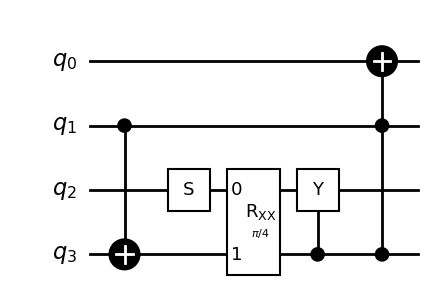

In [56]:
#Duotajai qiskit schemai sympy priemonėmis raskite atitinkamą unitarinę transformaciją, atitinkamus tikrinius vektorius ir jų fazes.

qc=QuantumCircuit(4)
qc.cx(1,3)
qc.s(2)
qc.rxx(np.pi/4, 2,3)
qc.cy(3,2)
qc.ccx(3,1,0)

mQc = sp.Matrix(Operator(qc).to_matrix())

qc.draw('mpl', style='bw')

In [58]:
from sympy.physics.quantum import TensorProduct
gateI=sp.Matrix([[1,0],[0,1]])
dc=QuantumCircuit(4)
dc.cx(1,3)
gateCX=sp.Matrix(Operator(dc).to_matrix())
gateS=sp.Matrix([[1,0],[0,1j]], dtype=complex)
dc=QuantumCircuit(4)
dc.cy(3,2)
gateY=sp.Matrix(Operator(dc).to_matrix())
ac=QuantumCircuit(4)
ac.ccx(3,1,0)
gateCCX=sp.Matrix(Operator(ac).to_matrix())
gateRXX=sp.Matrix([[sp.cos(pi/8),0,0,-1j*sp.sin(pi/8)],[0,sp.cos(pi/8),-1j*sp.sin(pi/8),0],[0,-1j*sp.sin(pi/8),sp.cos(pi/8),0],[-1j*sp.sin(pi/8),0,0,sp.cos(pi/8)]],dtype=complex)


state=sp.Matrix([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

ans = TensorProduct(gateI, gateI, gateI, gateI)

ans*=TensorProduct(gateCX)

display(ans*state)
ans*=TensorProduct(gateI, gateS, gateI, gateI)

ans*=TensorProduct( gateRXX, gateI, gateI)
display(ans*state)

ans*=TensorProduct(gateY)
display(ans*state)

ans*=TensorProduct(gateCCX)
display(ans*state)

display(ans)

#display(mQc)


Matrix([
[1.0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0]])

Matrix([
[1.0*sqrt(sqrt(2)/4 + 1/2)],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[1.0*sqrt(1/2 - sqrt(2)/4)],
[                        0],
[                        0],
[                        0]])

Matrix([
[1.0*sqrt(sqrt(2)/4 + 1/2)],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[1.0*sqrt(1/2 - sqrt(2)/4)],
[                        0],
[                        0],
[                        0]])

Matrix([
[1.0*sqrt(sqrt(2)/4 + 1/2)],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[                        0],
[1.0*sqrt(1/2 - sqrt(2)/4)],
[                        0],
[                        0],
[                        0]])

Matrix([
[1.0*sqrt(sqrt(2)/4 + 1/2),                         0,                         0,                         0,                            0,                            0,                            0,                            0,  1.0*sqrt(1/2 - sqrt(2)/4),                          0,                          0,                          0,                            0,                            0,                            0,                            0],
[                        0, 1.0*sqrt(sqrt(2)/4 + 1/2),                         0,                         0,                            0,                            0,                            0,                            0,                          0,  1.0*sqrt(1/2 - sqrt(2)/4),                          0,                          0,                            0,                            0,                            0,                            0],
[                        0,                         0,             

In [23]:
qc =QuantumCircuit(3)

qc.h(0)
qc.cx(1,2)
m1 = sp.Matrix(Operator(qc).to_matrix())

qc.x(2)
qc.h(1)

qc.draw("mpl", style="bw")

dc =QuantumCircuit(3)
dc.x(2)
dc.h(1)
m2 = sp.Matrix(Operator(dc).to_matrix())



In [61]:

#helpful:
#https://github.com/qiskit-community/qiskit-textbook/blob/main/content/ch-algorithms/quantum-phase-estimation.ipynb

def task():
    qc =QuantumCircuit(3)

    qc.h(0)
    qc.cx(1,2)
    qc.x(2)
    qc.h(1)
    
    return qc.to_gate()
def getPhases(eigenValues: list) -> np.array:
    solvePhases = []
    for i in range(len(eigenValues)):
        x = sp.Symbol("x")
        solveTemp = list(sp.solve(sp.exp(2 * sp.pi * sp.I * x) - eigenValues[i], x))
        solvePhases.append(solveTemp)
    solvePhases = np.array(solvePhases).flatten()
    solvePhases = [abs(sp.re(i)) for i in solvePhases]
    solvePhases = np.unique(solvePhases)
    return solvePhases
def getEigenValues(matrix: np.ndarray) -> list:
    gate = sp.Matrix(matrix)
    eigenVals = gate.eigenvals()
    eigenVals = list(eigenVals.keys())
    return eigenVals

def phaseEstimation(q):
    gate = task()
    qc = QuantumCircuit(6, 3)
    qc.h(range(3))
    qc.x(5)

    for i in range(3):
        for j in range(2**i):
            U = gate.control(1)
            qc.append(U, [i]+list(range(3, 6)))
    qc.append(QFT(3, do_swaps=False, inverse=True).to_instruction(), range(2,-1,-1))
    qc.measure(range(3), range(3))
    return qc

qc = phaseEstimation(3)
backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend, seed_transpiler=11)
job = backend.run(transpiled, shots=1024)
result = job.result()
count = list(result.get_counts().items())
count.sort(key = lambda x: x[1])
count.reverse()
count = [(int(x[::-1],2)/2**3,y/1024) for x,y in count]
c= np.array(count)

print("P.A.:",sp.Array(c))

print("\n",sp.Array(getPhases(getEigenValues(m1*m2))))


P.A.: [[0.0, 0.3525390625], [0.375, 0.224609375], [0.625, 0.2060546875], [0.5, 0.138671875], [0.125, 0.0419921875], [0.875, 0.0361328125]]

 [0, 0.125, 0.375, 0.5, 0.625, 0.875, 1.0]


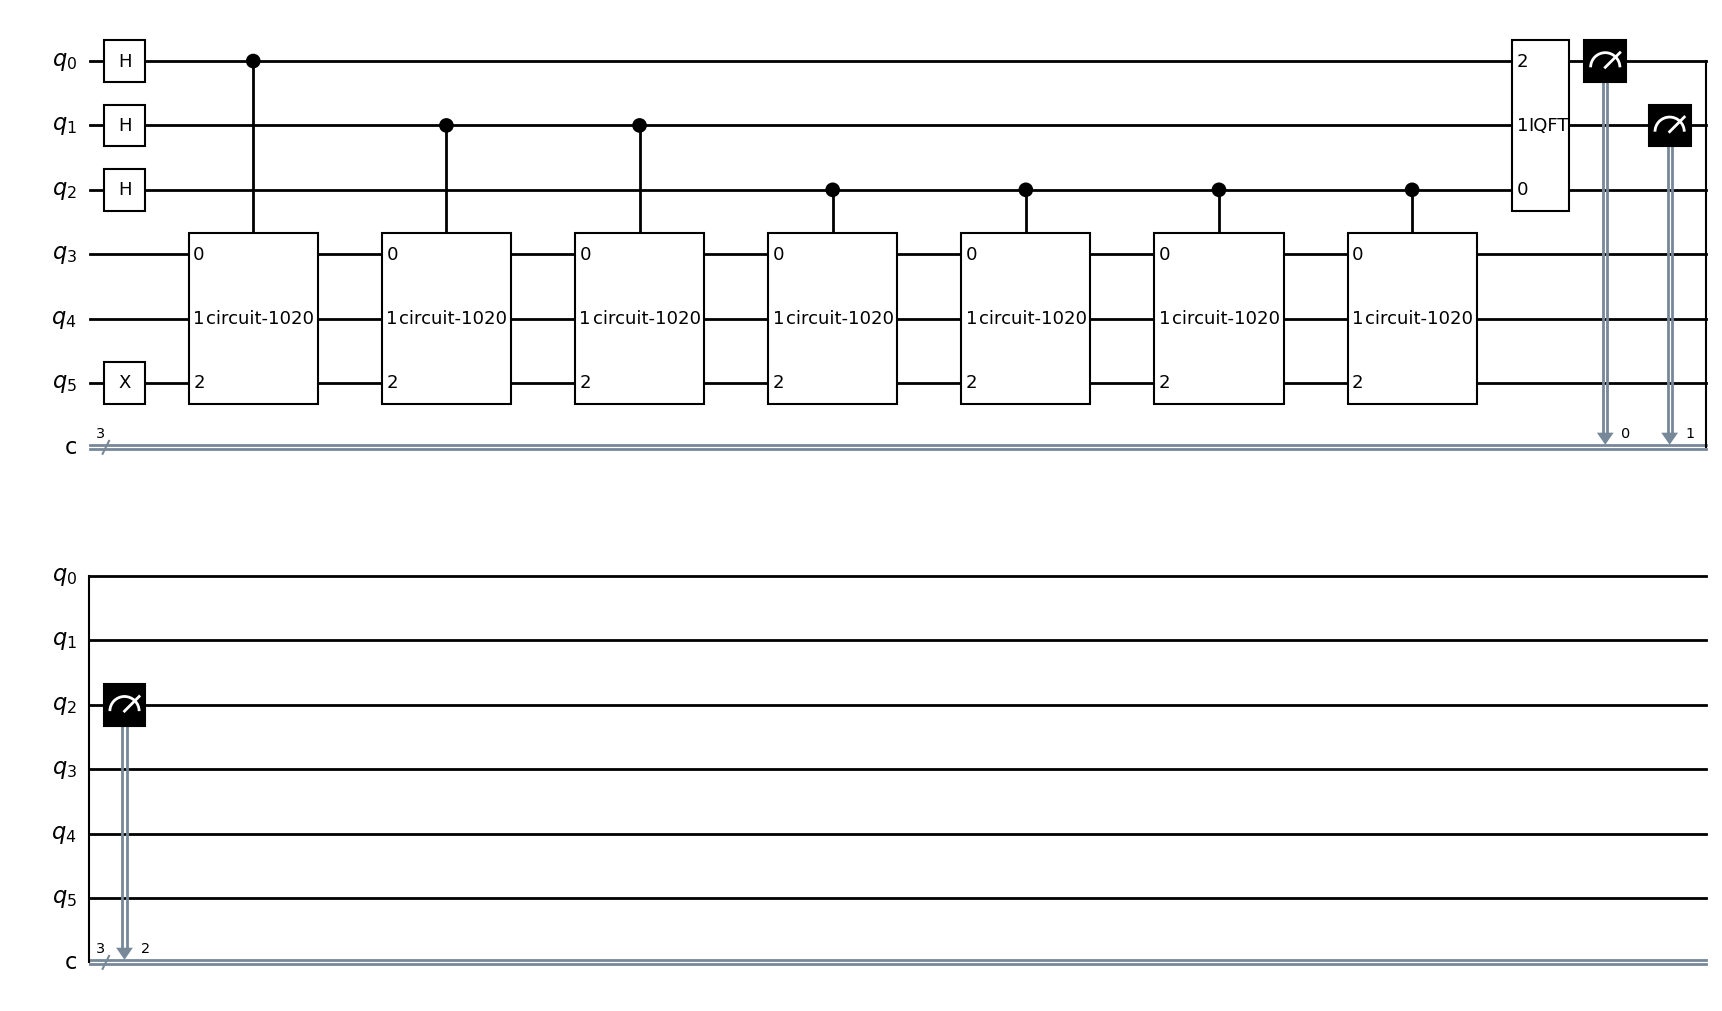

In [32]:
phaseEstimation(3).draw("mpl", style="bw")

In [6]:
# Duotiesiems  N  ir  a  raskite operatoriaus  Ma  matricą
N=25
a=13

ans=sp.zeros(N,N)
for i in range(N):
    ans[i*a%N,i]=1

display(ans)

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [5]:


def aList(N: int):
    aList: List[int] = []
    for i in range(N - 1):
        if math.gcd(i, N) == 1 and i != 1:
            remainder = 0
            count = 1
            while remainder != 1:
                if remainder == 0:
                    remainder = (i) % N
                remainder = (remainder * i) % N
                count += 1
            if count % 2 == 0:
                if (
                    math.gcd(i ** (count // 2) - 1, N) != 1
                    and math.gcd(i ** (count // 2) + 1, N) != 1
                ):
                    aList.append(i)
    return aList

def processMeasurement(measurement, n: int) -> (int, float):
    measuredInt: str = int("".join(map(str, measurement)), 2)
    phase = measuredInt / (2**n)
    f = Fraction.from_float(phase).limit_denominator(n)
    _, r = f.numerator, f.denominator
    return r, phase


def gateNoMatrix(a, N) -> Operator:
    qubits = math.ceil(math.log(N,2))
    var: List[str]=[]
    for i in range(qubits):
        l = chr(ord("a")+i)
        var.append(l)

    mod: List[(int, int)]=[]
    for i in range(2**qubits):
        if i < N:
            mod.append((i, (a * i) % N))
        else:
            mod.append((i, i))
    
    truthTable: List[List[str]] = []
    for index in range(qubits):
        truthIn: List[str] = []
        for i in range(2**qubits):
            _, value = mod[i]
            truthIn.append(bin(value)[2:].rjust(qubits, "0")[index])
        truthTable.append(truthIn)


    anfs = []
    
    for i in range(len(truthTable)):
        truthValuesI: List[int] = [int(j) for j in truthTable[i]]
        #anfForm: str = ANFform(l, truthValuesI).__str__()
        anfForm: str = str(ANFform(var, truthValuesI))
        
        anf: List[str] = anfForm.split(" ^ ")
        for i in range(len(anf)):
            anf[i] = anf[i].replace("(", "").replace(")", "")
            anf[i] = anf[i].split(" & ")
            for j in range(len(anf[i])):
                if anf[i][j] != "True":
                    for k in range(len(var)):
                        anf[i][j] = anf[i][j].replace(var[k], str(k))
                    anf[i][j] = int(anf[i][j])
        anfs.append(anf)

    qc = QuantumCircuit(2*qubits)
    I = qubits

    for i in range(len(anfs)):
        for j in range(len(anfs[i])):
            if anfs[i][j][0] == "True":
                qc.x(I)
            else:
                qc.mcx(anfs[i][j], I)
        i+=1

    qc.swap(range(qubits), range(qubits, 2*qubits))
    return qc.to_gate()


def gateFromMatrix(a, N) -> Operator:
    qubits = math.ceil(math.log(N,2))
    qc = QuantumCircuit(qubits)
    M = np.zeros((2**qubits, 2**qubits))
    for i in range(2**qubits):
        if i<N:
            M[a*i%N][i]=1
        else:
            M[i][i]=1;
    qc.unitary(M, range(qubits))
    return Operator(qc)

def makeCs(times, gate, size):
    qc = QuantumCircuit(size)
    for i in range(times):
        qc.append(gate, range(size-1,-1,-1))
    gate = qc.to_gate()
    return gate.control(1)

def produceCircuits(a, N, controlledQubits, phaseEstimationQubits, matrix):
    circuits: List[QuantumCircuit] = []

    if matrix:
        gate: Operator = gateFromMatrix(a, N)
        for i in range(controlledQubits):
            qc = QuantumCircuit(controlledQubits+phaseEstimationQubits)
            qc.append(makeCs(1, gate, controlledQubits), [i] + list(range(controlledQubits, controlledQubits+phaseEstimationQubits)))
            circuits.append(qc)
    else:
        gate = gateNoMatrix(a,N)
        gate = gate.control(1) 

        for i in range(controlledQubits):
            qc =QuantumCircuit(controlledQubits + 2* phaseEstimationQubits)
            for j in range(2**i):
                qc.append(gate, [i] +list(range(controlledQubits, controlledQubits+phaseEstimationQubits*2)))
            qc.reset(range(controlledQubits + phaseEstimationQubits, controlledQubits+phaseEstimationQubits*2))
            circuits.append(qc)

    return circuits 


def makeCircuit(a, N, controlledQubits, phaseEstimationQubits, matrix):
    if matrix:
        qc = QuantumCircuit(controlledQubits+phaseEstimationQubits, controlledQubits)
    else:
        qc= QuantumCircuit(controlledQubits+phaseEstimationQubits*2, controlledQubits)

    qc.h(range(controlledQubits))
    qc.x(controlledQubits + phaseEstimationQubits - 1)

    circuits: List[QuantumCircuit] = produceCircuits(a,N, controlledQubits, phaseEstimationQubits, matrix)

    for i in range(controlledQubits):
        if matrix:
            qc.append(circuits[i], range(controlledQubits+phaseEstimationQubits))
        else:
            for j in range(2**i):
                qc.append(circuits[i], range(controlledQubits+phaseEstimationQubits*2))

    qc.append(Operator(QFT(controlledQubits).inverse()).to_instruction(), range(controlledQubits-1,-1,-1))
    qc.measure(range(controlledQubits), range(controlledQubits))
    return qc


def shors(N, matrix):
    controlledQubits: int = math.ceil(math.log(N, 2))
    phaseEstimationQubits: int = math.ceil(math.log(N, 2))

    aListThatWorks = aList(N)

    if len(aListThatWorks)==0:
        print("Error. Nera tinkamu: a")
    else:
        a=0
        while a not in aListThatWorks:
            a=np.random.randint(2,N)
        print("N =", N)
        print("a =", a)

        qc = makeCircuit(a, N, controlledQubits, phaseEstimationQubits, matrix)

        print("circuit has been constructed")

        notFound=True
        while notFound:
            nc=transpile(qc, backend)
            run=backend.run(nc)
            result=run.result()
            counts = result.get_counts(qc)
            counts = list(result.get_counts().keys())
            print("counts:", counts)

            r, p = processMeasurement(counts[0], controlledQubits)
            
            if p!=0 and r% 2 == 0:
                guesses = [math.gcd(a**(r//2)-1, N), math.gcd(a**(r//2)+1, N)]
                for g in guesses:
                    if g!=1:
                        notFound=False
                        print("\n","ANS.: ", g, ",", N//g)
                        break
    return qc



In [7]:
N=161
qc = shors(N, True)

N = 161
a = 15
circuit has been constructed
counts: ['01100100', '00011011', '00011000', '11101001', '10111011', '01000110', '11001011', '01110011', '10111010', '11000010', '01011110', '00010100', '00110111', '01111010', '01110110', '00010011', '11001100', '00111010', '10000110', '00101001', '11010000', '00100001', '00111101', '00010001', '11011110', '11111101', '00001001', '01111101', '10000100', '00000011', '10010100', '11110101', '00100101', '11010111', '01110000', '11111100', '11010110', '01100010', '00000100', '01101111', '00000101', '11101101', '10000000', '00001110', '11101100', '11100100', '11110111', '10101100', '10100000', '00001111', '10110101', '10010011', '10100100', '00000000', '11110011', '01111111', '01000010', '00111111', '11111010', '01101101', '00001000', '10100011', '11101111', '11011001', '10100001', '11110110', '10111101', '10011000', '10010110', '01101110', '00001010', '01000001', '11010100', '10000010', '11011101', '10010001', '10010101', '10101011', '00010000',

In [9]:

N = 15
qc = shors(N, False)

N = 15
a = 13
circuit has been constructed
counts: ['1101', '0001', '0100', '0010', '0000', '0110', '1000', '1100', '1011', '0011', '0111', '1110', '1001', '0101', '1111', '1010']

 ANS.:  3 , 5


1 0 0 0 1
1 0 0 1 1
1 0 1 0 1
{'01010': 17, '01111': 15, '00010': 18, '11000': 21, '10101': 132, '11100': 25, '10010': 21, '00001': 27, '00110': 22, '01100': 26, '01000': 26, '00100': 18, '10110': 28, '01110': 19, '10001': 137, '01001': 20, '11010': 22, '00101': 16, '10011': 134, '00000': 22, '11001': 23, '00011': 18, '00111': 28, '01011': 20, '10111': 15, '10100': 19, '01101': 23, '11111': 28, '11011': 28, '10000': 17, '11110': 18, '11101': 21}


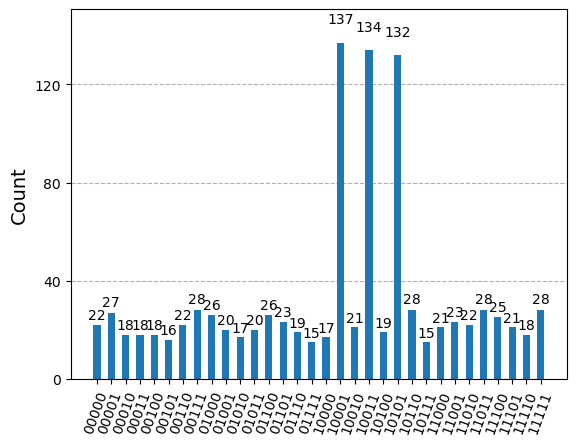

In [2]:
# Naudodami Groverio algoritmą išspęskite savo varianto lygtį,
# jeigu žinoma, kad visi nežinomieji yra bitai:

# (a+b)(c&d+1)+a=(e&a+2)^2 , sudėtis ir daugyba yra moduliu 5.

from qiskit.visualization import plot_histogram

def makeUn(size, values):
    un=np.zeros((2**size,2**size))
    for i in range(2**size):
        un[i][i]=-1
        
    un[0][0]=1

    # no idea why putting so many h and x gates makes this work
    qc = QuantumCircuit(size)
    qc.h(range(size))
    qc.x(range(size))
    qc.h(range(size))
    qc.x(range(size))
    qc.h(range(size))
    qc.x(range(size))
    qc.h(range(size))
    qc.unitary(un, range(size))
    qc.h(range(size))
    qc.x(range(size))
    qc.h(range(size))
    qc.x(range(size))
    qc.h(range(size))
    qc.x(range(size))
    qc.h(range(size))
    qc.name="  Un  "
    return qc.to_gate() 




def makeU(value):
    
    ats=np.zeros((2**5*2, 2**5*2))
    for i in range(2**5):
        if(value[i,0]==1):
            ats[2*i+1][2*i]=1
            ats[2*i][2*i+1]=1
        else:
            ats[2*i+1][2*i+1]=1
            ats[2*i][2*i]=1

    
    qc = QuantumCircuit(6)
    qc.unitary(ats, range(6))
    qc.name="  Uf  "
    return qc.to_gate() 


values=sp.zeros(2**5,1)
z=0

for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    lhs = (a + b) * ((c and d) + 1) + a
                   
                    rhs = ((e and a) + 2) ** 2

                    if lhs%7==rhs%7:
                        values[z,0]=1
                        print(a,b,c,d,e)
                    z+=1

#display(values)

qc=QuantumCircuit(6,5)

qc.x(5)
qc.h(range(5))

for i in range(3):
    qc.barrier()
    qc.append(makeU(values), range(5,-1,-1))
    
    qc.h(range(5))
    qc.x(range(5))
    qc.append(makeUn(5, values), range(4,-1,-1))
   
    qc.x(range(5))
    qc.h(range(5))
    



qc.measure(range(5), range(4,-1,-1))

nc=transpile(qc, backend)
run=backend.run(nc)
result=run.result()
counts = result.get_counts(qc)
print(counts)

qc.draw('mpl', style='bw')


plot_histogram(counts)


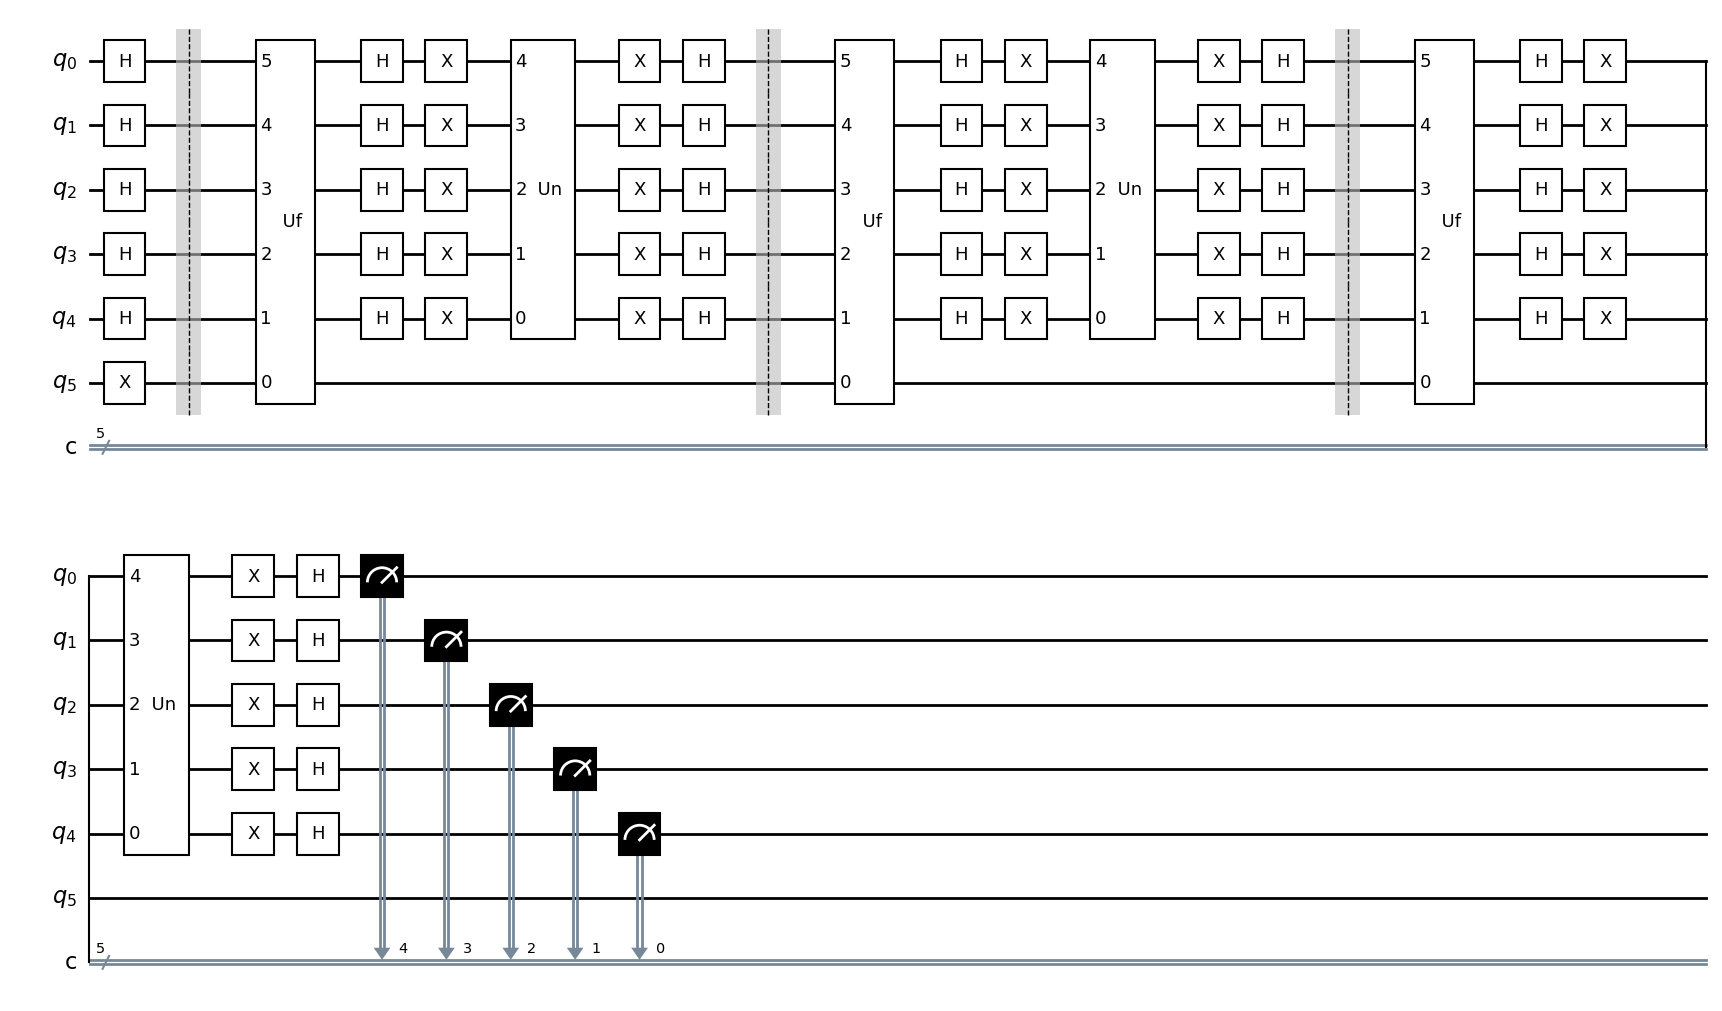

In [182]:
qc.draw('mpl', style='bw')